<a href="https://colab.research.google.com/github/juandahur/ML-UdeA-Reto-Tec/blob/main/Reto_Tecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RETO TECNÓLOGICO
##Alejandro Correa - Juan David Hurtado 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import json

In [2]:
airports = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airports.csv')
airports_freq = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airport-frequencies.csv')
runways = pd.read_csv('https://davidmegginson.github.io/ourairports-data/runways.csv')
countries = pd.read_csv('https://davidmegginson.github.io/ourairports-data/countries.csv')
regions = pd.read_csv('https://davidmegginson.github.io/ourairports-data/regions.csv')
iso_countries = pd.read_csv('https://datahub.io/core/country-list/r/data.csv')
departures_MDE_nal = pd.read_csv('http://medata.gov.co/sites/default/files/medata_harvest_files/salida_mensual_pasajeros_aeropuertos_destino_nacional.csv',sep=';')
ticket_dataset = pd.read_csv('/content/sample_data/ticket_dataset_MOW.csv',sep=';')

with open('/content/sample_data/IATA_Airlines.json','r') as f:
    data = json.loads(f.read())

airlines = pd.json_normalize(data, max_level=1)



#BASE DE DATOS AERONAÚTICA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

#origen_destino = pd.read_csv('/content/sample_data/BD.xlsx')
#ticket_dataset = pd.read_csv('/content/ticket_dataset_MOW.csv',sep=';')
origen_destino = pd.read_excel('/content/sample_data/BD.xlsx')



In [ ]:
origen_destino.head()

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
1,AVA,AVIANCA,2021-12-01,2021,12,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,67959.0,182750.0
2,AVA,AVIANCA,2021-11-01,2021,11,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,64290.0,169692.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0


##1. Agrupe los vuelos por ciudad de destino

In [ ]:
popularidad = origen_destino.groupby('Ciudad Destino').size().to_frame('Cuenta').reset_index()
popularidad.columns

Index(['Ciudad Destino', 'Cuenta'], dtype='object')

In [ ]:
popularidad.sort_values("Cuenta",ascending=False,inplace=True)
popularidad2 = popularidad.head(5)
popularidad2

,Ciudad Destino,Cuenta
60,BOGOTA,11687
360,RIONEGRO - ANTIOQUIA,3594
262,MITU,2606
79,CALI,2225
88,CARTAGENA,2119


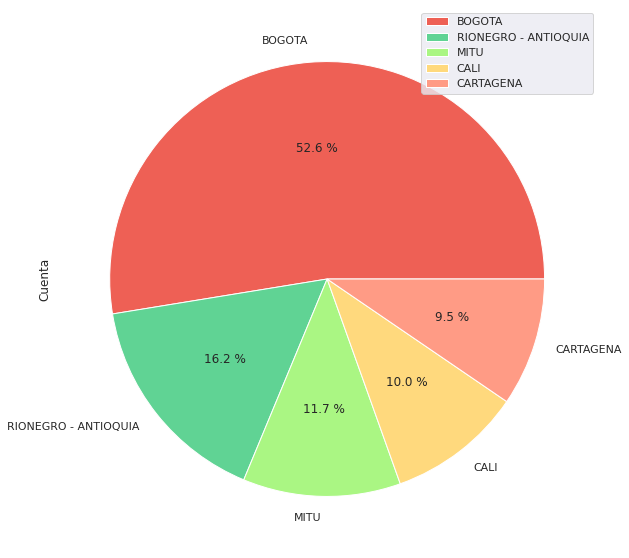

In [ ]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
popularidad2.plot(kind='pie', y='Cuenta',labels=popularidad2['Ciudad Destino'],autopct="%0.1f %%", colors= colores)

##2. Liste los vuelos por aerolínea con destino Rionegro

In [ ]:
Rionegro = origen_destino[origen_destino['Ciudad Destino'] == 'RIONEGRO - ANTIOQUIA']
Rionegro

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0
10,AVA,AVIANCA,2021-08-01,2021,8,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53850.0,191554.0
11,AVA,AVIANCA,2021-09-01,2021,9,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53213.0,208283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63404,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,CLO,CALI - ALFONSO BONILLA ARAGON,CALI,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,0.0,18301.0
63408,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MAO,EDUARDO GOMES INTL,MANAUS,BRASIL,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,1420.0
63413,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MIA,MIAMI INTL,MIAMI,ESTADOS UNIDOS,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,332872.0
63416,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,SAL,EL SALVADOR INTL,SAN SALVADOR,EL SALVADOR,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,C,0.0,928.0


In [ ]:
aerolineas = Rionegro.groupby('Nombre').size().to_frame('Cantidad de vuelos').reset_index()
aerolineas.sort_values('Cantidad de vuelos',ascending=False,inplace=True)
aerolineas2 = aerolineas.head(15)
aerolineas2


,Nombre,Cantidad de vuelos
12,AMERICAN,866
15,AVIANCA,519
5,AEROMEXICO SUCURSAL COLOMBIA,473
47,SPIRIT AIRLINES,344
31,JETBLUE AIRWAYS CORPORATION,285
21,FAST COLOMBIA SAS,177
10,AIR EUROPA,163
11,AIRES,108
30,INTEREJECUTIVA,100
42,SEARCA S.A.,55


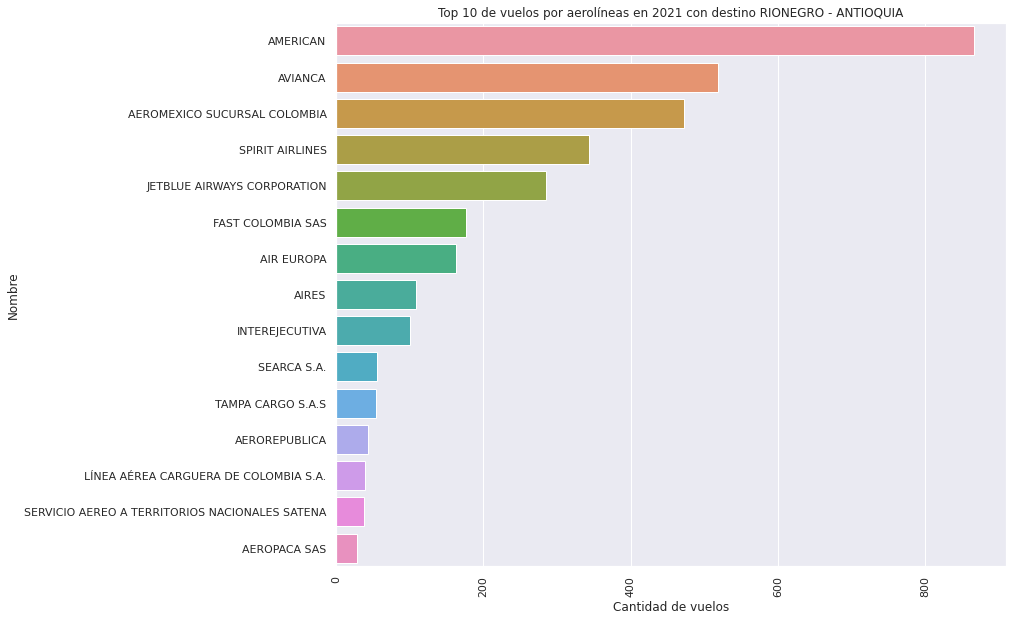

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Cantidad de vuelos", y ="Nombre", data = aerolineas2)
plt.title("Top 10 de vuelos por aerolíneas en 2021 con destino RIONEGRO - ANTIOQUIA")
plt.xticks(rotation= 90);
plt.show()

##3. Listado de los vuelos por aerolínea , por la ciudad de destino, su cantidad de escalas, cantidad de pasajeros movilizados ordenados de mayor a menor y viceversa. El usuario debe elegir el orden de visualización. (Grafico de líneas)

In [ ]:
origen_destino[['Nombre','Fecha','Origen','Nombre.1','Pais Origen','Destino','Nombre.2','Pais Destino','Pasajeros']].sort_values('Pasajeros', ascending=False)

,Nombre,Fecha,Origen,Nombre.1,Pais Origen,Destino,Nombre.2,Pais Destino,Pasajeros
0,AVIANCA,2021-12-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,68743.0
1,AVIANCA,2021-12-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,67959.0
2,AVIANCA,2021-11-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,64290.0
3,AVIANCA,2021-11-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,63649.0
4,AVIANCA,2021-10-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,58747.0
...,...,...,...,...,...,...,...,...,...
63436,TAC,2021-01-01,TBQ,TIMBIQUI,COLOMBIA,CLO,CALI - ALFONSO BONILLA ARAGON,COLOMBIA,NaN
63437,AEROMENEGUA,2021-04-01,MVP,MITU,COLOMBIA,MTN,BUENOS AIRES - VAUPES,COLOMBIA,NaN
63438,TURKISH AIRLINES INC,2021-08-01,ABJ,ABIDJAN,COSTA DE MARFIL,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN
63439,LAS,2021-10-01,LIM,CALLAO /INTL JORGE CHAVEZ,PERU,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN


##4. Dado un parámetro de entrada y orden seleccionado, liste la aerolínea con mayores y menores ingresos por ruta. 


In [ ]:
ticket_dataset.head()

Se usa el dataset de aeropuertos y se cambia el código IATA por el nombre de la ciudad en el dataset de tiquetes

In [5]:
ticket_dataset_ciudades = ticket_dataset.merge(
    airports[['municipality','iata_code']],
    left_on = 'destination',
    right_on = 'iata_code',
    how = 'left'
)[['municipality','airline','depart_date','value',]]
#[['municipality','airline','value']].head(30)
ticket_dataset_ciudades.head()

,municipality,airline,depart_date,value
0,Split,N4,25/02/2022,10570.0
1,Samsun,A4,23/02/2022,7290.0
2,Abakan,WZ,21/02/2022,8130.0
3,Cairo,DP,28/02/2022,8220.0
4,Gaziantep,DP,16/02/2022,6819.0


Se usa el dataset de aerolíneas y se cambia el código de la aerolínea por el nombre la misma en el dataset de tiquetes. Se guarda en la variable df_ciudades_aerolineas.

In [60]:
df_ciudades_aerolineas = ticket_dataset_ciudades.merge(
    airlines[['name_translations.en','code']],
    left_on = 'airline',
    right_on = 'code',
    how = 'left'
)[['municipality','name_translations.en','depart_date','value']]
df_ciudades_aerolineas.rename(columns={'municipality':'Ciudad',
                        'name_translations.en':'Aerolinea', 'depart_date': 'Fecha Salida','value':'Valor'},
               inplace=True)
df_ciudades_aerolineas

,Ciudad,Aerolinea,Fecha Salida,Valor
0,Split,Nordwind Airlines,25/02/2022,10570.0
1,Samsun,Azimut,23/02/2022,7290.0
2,Abakan,Red Wings Airlines,21/02/2022,8130.0
3,Cairo,Pobeda,28/02/2022,8220.0
4,Gaziantep,Pobeda,16/02/2022,6819.0
...,...,...,...,...
4786,"Kowloon City, Kowloon",Turkish Airlines,28/12/2022,23341.0
4787,Phu Quoc Island,Qatar Airways,28/12/2022,44964.0
4788,Yerevan,S7 Airlines,6/12/2022,5830.0
4789,Novy Urengoy,S7 Airlines,16/12/2022,8443.0


Sumatoria de costos de tiquetes por ruta por aerolínea

In [44]:
#ticket_dataset_ruta = ticket_dataset[['destination','value','airline']].groupby(['destination','airline','value']).sum().sort_values('destination',ascending=True).reset_index()
df_suma_destino_aerolinea = df_ciudades_aerolineas.groupby(['Ciudad','Aerolinea']).sum('Valor').sort_values('Ciudad',ascending=True).reset_index()
df_suma_destino_aerolinea.head(5)


,Ciudad,Aerolinea,Valor
0,Aalborg,Air France,18144.0
1,Aalborg,Finnair,19389.0
2,Aarhus,Wizz Air,11572.0
3,Abakan,NordStar,8150.0
4,Abakan,Nordwind Airlines,15592.0


Listado de ciudades destino del aeropuerto de Moscú para seleccionar a continuación

In [ ]:
df_suma_destino_aerolinea['Ciudad'].unique()

Se solicita el ingreso de la ciudad y el orden para listarlo

In [46]:
ciudad_seleccionada = 'Miami'

orden = 'A' 

if orden == 'A':
  ascendente = True
  orden_graficar = 'Ascendente'
elif orden == 'D':
  ascendente = False
  orden_graficar = 'Descendente'

df_max_min_destino = df_suma_destino_aerolinea[df_suma_destino_aerolinea['Ciudad']==ciudad_seleccionada].sort_values('Valor',ascending = orden )
df_max_min_destino

,Ciudad,Aerolinea,Valor
1154,Miami,Aeroflot,21696.0
1155,Miami,Turkish Airlines,187549.0


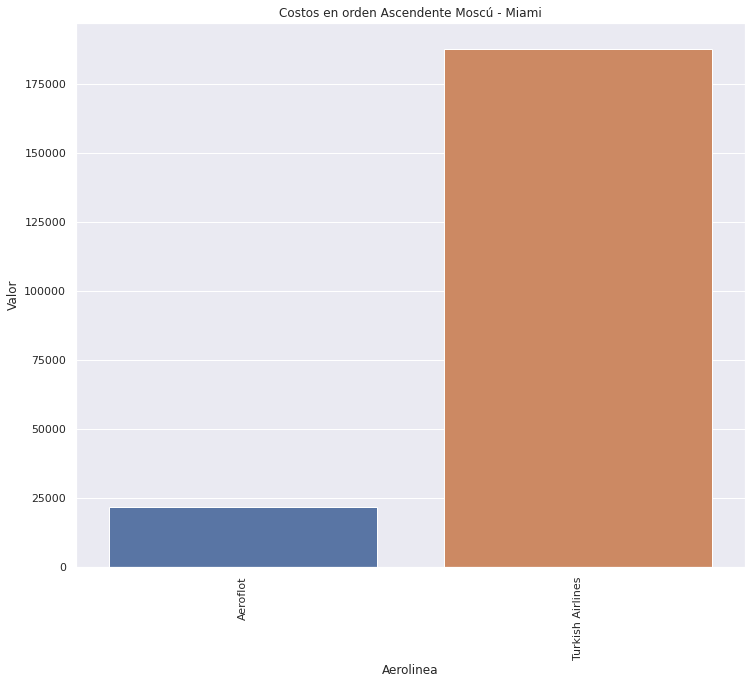

In [47]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Aerolinea", y ="Valor", data = df_max_min_destino)
plt.title(f"Costos en orden {orden_graficar} Moscú - {ciudad_seleccionada}")
plt.xticks(rotation= 90);
plt.show()

##5. Halle costo promedio de pasaje por vuelo, calcule el ingreso promedio por vuelo por ciudad


Costo promedio de tiquetes por ciudad

In [33]:
Valor_Promedio = df_ciudades_aerolineas[['Ciudad','Valor']].groupby('Ciudad').mean().reset_index()
Valor_Promedio.head(5)

,Ciudad,Valor
0,Aalborg,12511.000000
1,Aarhus,11572.000000
2,Abakan,9884.200000
3,Aberdeen,11505.666667
4,Abha,32250.500000


Seleccionar las 30 rutas mas costosas y se almacena en la variable Valor_Promedio_g

In [34]:
Valor_Promedio_g = Valor_Promedio.sort_values('Valor',ascending=False).head(30)
Valor_Promedio_g.head(5)

,Ciudad,Valor
908,Zhengzhou,291808.0
590,Oakland,206662.0
571,Ningbo,156899.0
423,Kunming,138334.0
793,Tainan (Rende),114069.0


Se usa la librería Seaborn para graficar 

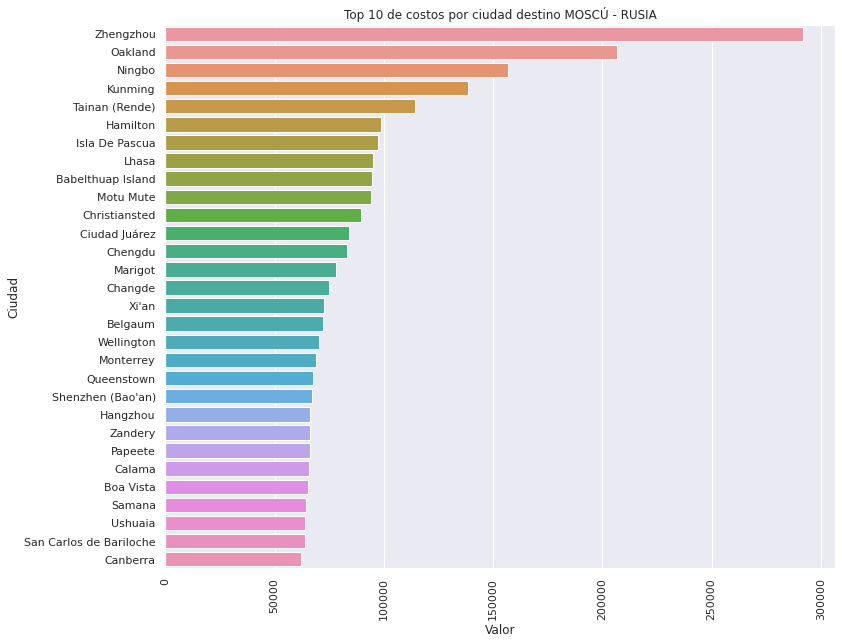

In [35]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Valor", y ="Ciudad", data = Valor_Promedio_g)
plt.title("Top 10 de costos por ciudad destino MOSCÚ - RUSIA")
plt.xticks(rotation= 90);
plt.show()

##6. Entregue el total de pasajeros movilizados por inventario agrupado por categoría 
de producto.


##7. Costo por ruta por aerolínea en un rango de tiempo ingresado por teclado


Inicialmente se debe cambiar el tipo de la columna 'Fecha Salida' que en el momento es tipo 'objeto'

In [61]:
df_ciudades_aerolineas.dtypes

Ciudad           object
Aerolinea        object
Fecha Salida     object
Valor           float64
dtype: object

Se cambia el tipo de columna 'Fecha Salida' a datetime

In [62]:
df_ciudades_aerolineas['Fecha Salida']= pd.to_datetime(df_ciudades_aerolineas['Fecha Salida'])
df_ciudades_aerolineas.dtypes

Ciudad                  object
Aerolinea               object
Fecha Salida    datetime64[ns]
Valor                  float64
dtype: object

Se solicita el intervalo de fecha que se desea

In [64]:
#fecha_inicial = '2022-01-10'
#fecha_final = '2022-01-30'
def comprobar_fecha(text):
    try:
        datetime.datetime.strptime(text, '%Y-%m-%d')
    except:
        return "El formato debe ser  YYYY-MM-DD"
    return datetime.datetime.strptime(text, '%Y-%m-%d')

fecha_inicial = input("Ingresa la fecha inicial: ")
comprobar_fecha(fecha_inicial)
fecha_final = input("Ingresa la fecha final: ")
comprobar_fecha(fecha_final)

df_ciudades_aerolineas_fecha = df_ciudades_aerolineas[
                        (df_ciudades_aerolineas['Fecha Salida'] > fecha_inicial) &
                        (df_ciudades_aerolineas['Fecha Salida'] < fecha_final)
]
df_ciudades_aerolineas_fecha

Ingresa la fecha inicial: 2022-01-10
Ingresa la fecha final: 2022-01-30


,Ciudad,Aerolinea,Fecha Salida,Valor
4254,Cairo,Aegean Airlines,2022-01-11,8928.0
4268,New Delhi,Etihad Airways,2022-01-11,12050.0
4270,Saratov,S7 Airlines,2022-01-11,3585.0
4285,Bergen,Finnair,2022-01-11,8204.0
4326,Bishkek,Turkish Airlines,2022-01-11,12632.0
...,...,...,...,...
4753,Honolulu,Turkish Airlines,2022-01-12,40010.0
4769,Mexico City,Turkish Airlines,2022-01-12,34610.0
4780,Cartagena,Turkish Airlines,2022-01-12,33836.0
4781,Phnom Penh (Pou Senchey),Oman Air,2022-01-12,25721.0


Se encuentra la sumatoria del costo por trayecto y por aerolínea

In [66]:
df_ciudades_aerolineas_fecha_g = df_ciudades_aerolineas_fecha.groupby(['Ciudad','Aerolinea']).sum('Valor').reset_index()
df_ciudades_aerolineas_fecha_g.head()

,Ciudad,Aerolinea,Valor
0,Ahmedabad,Oman Air,22961.0
1,"Arnavutköy, Istanbul",Aegean Airlines,6781.0
2,Asunción,Turkish Airlines,51972.0
3,Auckland,Malaysia Airlines,58390.0
4,Bangalore,Etihad Airways,20690.0


Se grafica con la librería seaborn

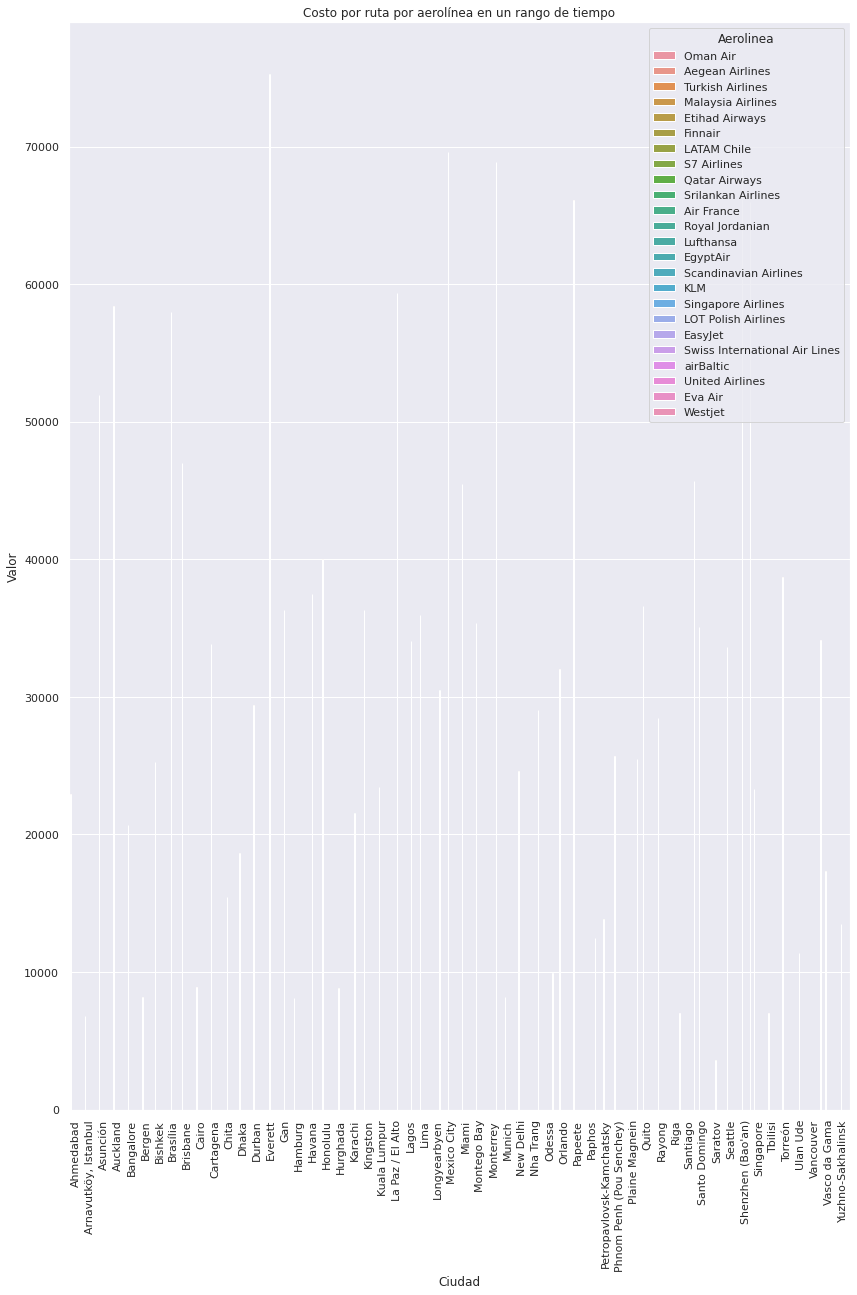

In [67]:
sns.set(rc={"figure.figsize":(14,20)})
sns.barplot(x ="Ciudad", y ="Valor", data = df_ciudades_aerolineas_fecha_g, hue = 'Aerolinea')
plt.title("Costo por ruta por aerolínea en un rango de tiempo")
plt.xticks(rotation= 90);
plt.show()